### 머신러닝 전체과정
- 문제정의 (목표설정) : 주제, 어떤 데이터를 수집 할 지 ..
- 데이터 수집 : kaggle 데이터 가져오기
- 데이터 전처리
- EDA 탐색적 데이터 분석
- 모델선택 및 하이퍼파라미터 조절
- 학습
- 예측 및 평가


### 1. 문제정의
- 타이타닉 데이터를 학습하여 생존자와 사망자 예측 해보자!

### 2. 데이터 수집
- kaggle에서 다운받은 train, test 데이터 활용
- 인덱스 PassengerID로 불러오기

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 머신러닝
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# 교자검증
from sklearn.model_selection import cross_val_score
# 분리
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv("./data/train.csv", index_col='PassengerId')
test = pd.read_csv("./data/test.csv", index_col='PassengerId')


In [3]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
print("학습용 문제 데이터 : ", train.shape)
print("테스트용 문제 데이터 : ", test.shape)

학습용 문제 데이터 :  (891, 11)
테스트용 문제 데이터 :  (418, 10)


In [5]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


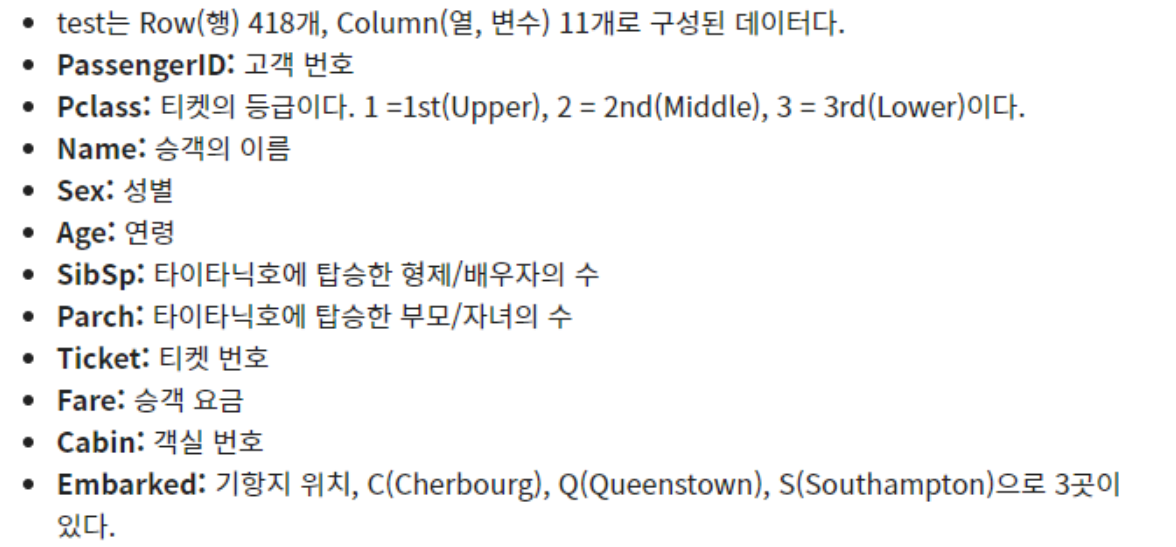

### 3. 데이터 전처리

In [6]:
train.info()
test.info()
# 결측치 확인
# train 결측치 : Age(나이), Cabin(객실번호), Embarked(탑승항구)
# test 결측치 : Age(나이), Fare(요금), Cabin(객실번호)

# 기계학습 하기 위해 모든 데이터들이 값을 가져야 한다


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non

#### train의 Age 결측치 채우기
- 단순 기술통계량(평균, 최대, 최소)으로 채우는 것은 좋지 않음!
- 다른 컬럼들간의 상관관계를 이용하여 결측치를 채워보자

In [7]:
# 기술통계량 확인
train['Age'].describe()
# 평균 29, 최대 80 => 평균이 50 근방이 아니므로 앞쪽(젊은 층)으로 데이터가 몰려있다.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
# 상관관계  : 각 특성들의 관계를 숫자로 표현
# -1 ~ 1 까지 범위를 가짐
# -1에 가까울수록 음의 상관관계
# 0 상관관계 없음
# 1에 가까울 수록 양의 상관관계

train.corr()
# Pclass 가 가장 높은 상관관계를 가진다는 것을 확인
# Age데이터롸 가장 높은 상관관계를 가지는 Pclass를 활용하여 결측치를 채워보자!

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- AGE데이터와 가장 높은 상관관계를 가진 Pclass 활용하여 결측치 채우기(기술통계량)
- 생존에 관련이 많을 것 같은  Sex 데이터도 함께 사용(기본지식)

In [9]:
# 피봇 테이블 : 각 테이블의 요약된 정보를 출력할 수 있는 테이블 형태
pt1 = train.pivot_table(values='Age', #데이터로 사용 할 컬럼 지정
                  index=['Pclass', 'Sex'], # 데이터 요약시 확인하고 싶은 컬럼
                  aggfunc='mean' )  # 각 그룹별로 조회할 값
pt1
# 각 pclass별, 여성, 남성별로 나이 평균 계산됨
# 결측치를 채울 때 단순 평균보다는 관련있는 값들로 채워주면 더 높은 정확도를 보인다!
# 상관관계를 확인한 이유..!

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [10]:
# 다중 인덱싱(멀티 인덱싱) -> 두개 이상의 인덱스가 있을 때 값 가져오는 방법
# 테이블명.loc[(앞인덱스, 뒤인덱스), 컬럼이름]

# 1등급 여성 나이 평균
# pt1.loc[('Pclass', 'Sex'), 'Age']
pt1.loc[(1, 'female'), 'Age']

34.61176470588235

In [11]:
# 2등급, 남성  나이 평균
print(pt1.loc[(2,'male'),'Age'])
# 3등급, 여성 나이 평균
print(pt1.loc[(3,'female'),'Age'])

30.74070707070707
21.75


- Age 컬럼의 결측치를 채워주는 함수 (fill_age) 정의 한 후 apply 함수로 한번에 적용
    - apply: 행 또는 열에 특정 함수를 일괄적으로 적용시키는 함수


In [12]:
# 'Age' 결측치를 채우는 함수 정의하기
def fill_age (data):
    # 만약 Age컬럼에 결측치가 있다면 피벗테이블에서 값을 가져오기
    if pd.isna(data['Age']):
        # 비어있는 값에 맞는 Age
        return pt1.loc[(data['Pclass'], data['Sex']),'Age']
    # 결측치가 없다면 원래 나이값 그대로 사용
    else:
        # 원래 Age컬럼의 값을 그대로 사용
        return data['Age']

In [13]:
# apply 함수 적용하기
# 적용하고 싶은 데이터프레임.apply(함수이름, 축 설정)
# 행,열, 0,1
train['Age'] = train.apply(fill_age, axis=1).astype('int64')

# .astype('int64') : 데이터타입을 변경해주는 함수 (나이 실수 아닌 정수값으로 표기)

In [14]:
train.info()
#  train의 AGE 결측치 채우기 성공!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [15]:
# test 데이터의 Age 컬럼도 채워주기!!- 동일한 함수
test['Age'] = test.apply(fill_age,axis=1).astype('int64')

In [16]:
pt2 = test.pivot_table(values='Age', #데이터로 사용 할 컬럼 지정
                  index=['Pclass', 'Sex'], # 데이터 요약시 확인하고 싶은 컬럼
                  aggfunc='mean' )  # 각 그룹별로 조회할 값
pt2

def fill_age2 (data):
    # 만약 Age컬럼에 결측치가 있다면 피벗테이블에서 값을 가져오기
    if pd.isna(data['Age']):
        # 비어있는 값에 맞는 Age
        return pt2.loc[(data['Pclass'], data['Sex']),'Age']
    # 결측치가 없다면 원래 나이값 그대로 사용
    else:
        # 원래 Age컬럼의 값을 그대로 사용
        return data['Age']

In [17]:
test['Age'] = test.apply(fill_age2,axis=1).astype('int64')

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


- train데이터로 만튼 피벗테이블에 대한 값으로 test의 결측칙를 채워도 될까?
    - test로 피벗 테이블을 만드는게 더 정확함
    - test로 만든 테이블도 거의 비슷한 값이 출력됨을 확인, 편의상 train데이터로 결측치를 채움
    - 만약 정확도를 더 올리고 싶다, test 데이터로 피복 테이블 생성해서 결측치 채워보자

train의 Embarked 컬럼 채우기 - 총 2개의 결측치

In [19]:
# 어떤 항구에서 가장 많이 탑승했을까
train['Embarked'].value_counts()
# 결측치가 단 두개 뿐이고 S항구에서 탑승한 승객이 압도적으로 많기 떄문에 결측치 'S'로 채워버리자..
# 데이터가 많으면 많을 수록 한 두개의 데이터는 큰 영향을 미치지 않음

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
# test도 확인
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [21]:
# .fillna(지정값) : 지정값으로 결측치 채워주는 함수
train['Embarked'] = train['Embarked'].fillna('S')
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


- test의 Fare 결측치 채우기
    - 결측치 한개!

In [23]:
# test의 기술통계량 확인
test['Fare'].describe()
# 평균은 35, 최대값 512 => 전체 평균으로 채우기에는 신뢰성이 떨어질 수 있다.

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [24]:
# Fare 데이터의 상관관계 확인 하기
test.corr()
# Fare와 높은 상관관계를 가지는 Pclass와 Sex컬럼을 가지고 결측치 채우자

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.520540,0.001087,0.018721,-0.577147
Age,-0.520540,1.000000,-0.084936,-0.062898,0.348593
SibSp,0.001087,-0.084936,1.000000,0.306895,0.171539
Parch,0.018721,-0.062898,0.306895,1.000000,0.230046
Fare,-0.577147,0.348593,0.171539,0.230046,1.000000


In [25]:
# 피벗테이블 만들기
pt3 = test.pivot_table(values='Fare', index=['Pclass', 'Sex'], aggfunc='mean' )  
pt3

Fare
Pclass Sex               
1      female  115.591168
       male     75.586551
2      female   26.438750
       male     20.184654
3      female   13.735129
       male     11.826350

In [26]:
# 비어있는 값이 한개이기때문에 함수 사용않고 출력해서 확인해보기
# 불리언 인덱싱 활용하여 빈 행 찾아오기
# .isnill() -> 결과가 boolen 형태로 출력
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [27]:
# Pclass가 3등급이고 성별이 남자인 데이터 평균 요금? 11.826350

test['Fare'] = test['Fare'].fillna(11.826350)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


Cabin 결측치 처리 (train, test 둘 다 존재)

In [28]:
train.info()
# Cabin 결측치 : 687 -> 실 데이터보다 결측치가 더 많음
# 컬럼 자체를 삭제 시키는 것 도 하나의 방법이 될 수 있음
# 일단, 결측치에 임의의 값을 넣어 시각화로 확인 후 뺄지 넣을 지 판단해보자!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [29]:
# 결측치 확인하기
train['Cabin'].isnull().value_counts()
# 비어있는 값이 월등히 많음 확인

True     687
False    204
Name: Cabin, dtype: int64

In [30]:
# 중복없이 값 출력
train['Cabin'].unique()
# 전체적으로는 데이터가 중복이 없어 의미 없어 보이지만 
# 객실ㅈ버호에서 숫자 값 큰으미 없을 것으로 판단
# 앞의 영문자(일정구역, 층) 활용하여 데이터의유의미함을 찾아보자

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [31]:
# train, test 데이터에서 Cabin컬럼의 결측치 임의의 문자 'm'으로채운 후 새로운 컬럼
train['Deck'] = train['Cabin'].fillna('M')

train['Deck'] 

PassengerId
1         M
2       C85
3         M
4      C123
5         M
       ... 
887       M
888     B42
889       M
890    C148
891       M
Name: Deck, Length: 891, dtype: object

In [32]:
test['Deck'] = test['Cabin'].fillna('M')
test['Deck'] 

PassengerId
892        M
893        M
894        M
895        M
896        M
        ... 
1305       M
1306    C105
1307       M
1308       M
1309       M
Name: Deck, Length: 418, dtype: object

In [33]:
train.head()
# 'Deck' 컬럼에서 알파벳만 가져와서 활용하자
train['Deck'].str[0]

PassengerId
1      M
2      C
3      M
4      C
5      M
      ..
887    M
888    B
889    M
890    C
891    M
Name: Deck, Length: 891, dtype: object

In [34]:
# train, tesrt 데이터에 대입
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

In [35]:
train['Deck']
test['Deck'] 

PassengerId
892     M
893     M
894     M
895     M
896     M
       ..
1305    M
1306    C
1307    M
1308    M
1309    M
Name: Deck, Length: 418, dtype: object

In [36]:
# train, test에서 의미가 없어진 기존 Cabin데이터 삭제
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin',axis=1, inplace=True)

In [37]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non

### 드디어 결측치 채우기 성공!


#### 4. 탐색적 데이터 분석
- train 데이터를 활용해서 탐색

- Deck에 대해서 시각화

In [38]:
# Deck,Survived, Name 컬럼을 가져와서 시각화
train[['Deck', 'Survived','Name']].groupby(['Deck','Survived']).count()


Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

In [39]:
train.pivot_table(values='Name',index=['Deck','Survived'], aggfunc='count')


Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

- M데이터 사망자가 많음 확인
- 시각화를 통해 눈으로 확인


<AxesSubplot:xlabel='Deck', ylabel='count'>

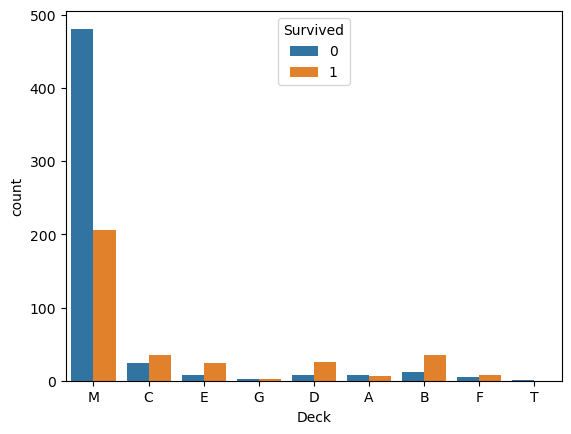

In [40]:
sns.countplot(data=train,
              x='Deck', # x축의 Deck 컬럼 유니크한 값들이 출력
              hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

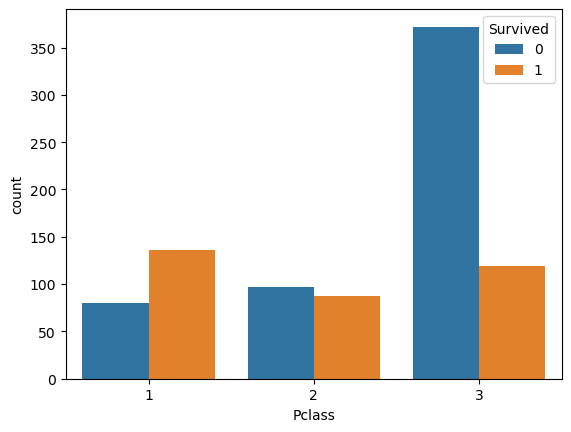

In [41]:
# pclass 시각화
sns.countplot(data=train,
              x='Pclass', # x축의 Deck 컬럼 유니크한 값들이 출력
              hue='Survived')
# 1등급- 생존률이 높은 편
# 2등급 - 비교적 사망률이 높은편
# 3등급 - 월등히 사망률이 높음

<AxesSubplot:xlabel='Deck', ylabel='count'>

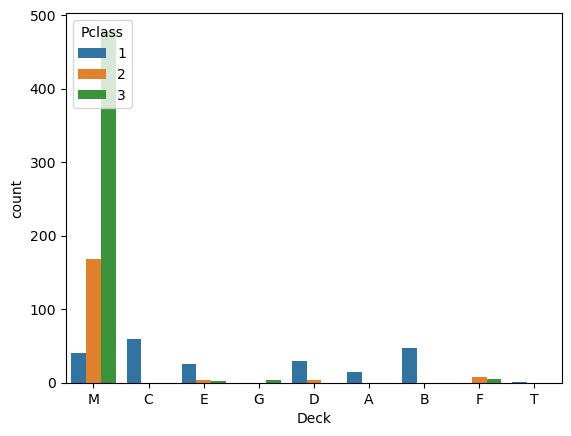

In [42]:
sns.countplot(data=train,
              x='Deck',
              hue='Pclass')

# M (결측치)에 머문 승객들이 3등급인 경우가 많았음!

<AxesSubplot:xlabel='Sex', ylabel='count'>

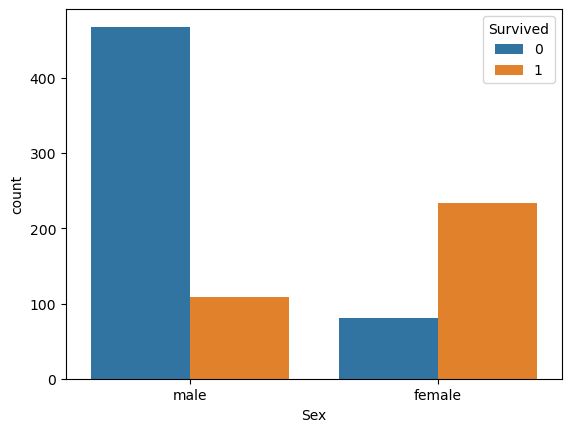

In [43]:
# 성별과 생존여부에 대한 그래프 그려보기 
sns.countplot(data=train,
              x='Sex',
              hue='Survived')
# 남자가 많이 사망했음 ㅠ

<AxesSubplot:xlabel='Embarked', ylabel='count'>

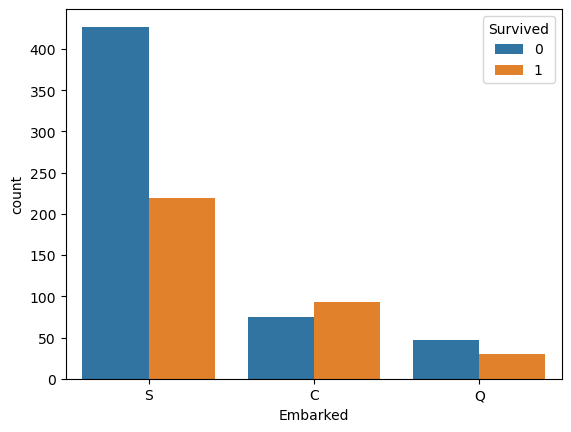

In [44]:
# Embarked와 생존여부
sns.countplot(data=train,
              x='Embarked',
              hue='Survived')
# S에서 탑승한 사람들의 사망 비율이 높다 (추측, 못하는 동네였을까?)
# C에서 탑승한 사람들의 생종률은 상대적으로 높다
# Q에서 탑승한 사람들의 사망률 상대적으로 높다 

In [45]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

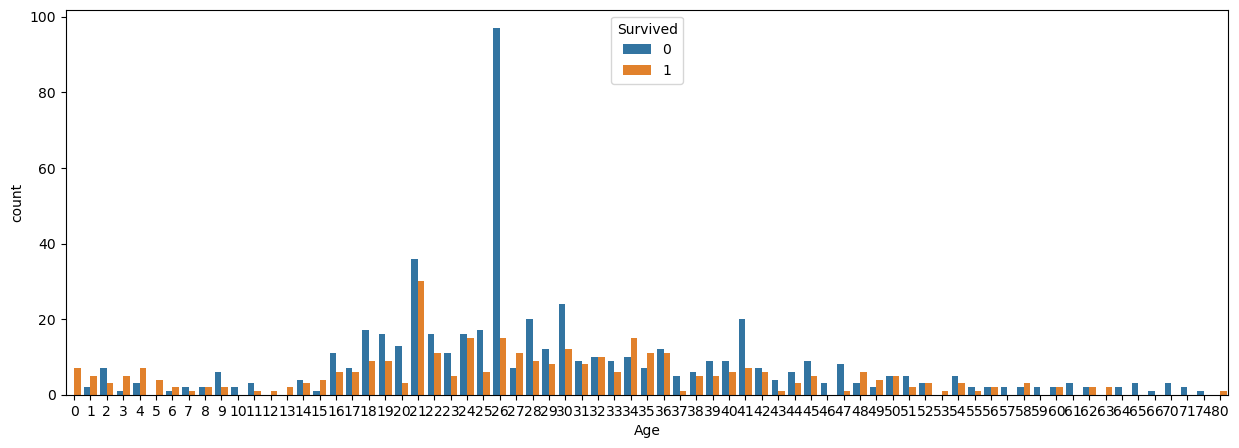

In [46]:
# 연속형 데이터는 분포그래프로 확인하는 것이 좋음!!!!

# Age데이터 시각화 -> 막대그래프보다 분포를 보는 겨ㅓㅅ이 좋음
plt.figure(figsize=(15,5))
sns.countplot(data=train,x='Age',hue='Survived')
# 나이 데이터를 막대 그래프로 시각화 하는 것은 의미없어 보임
# 분포를 확인할 수 있는 바이올린플롯으로 확인해보자

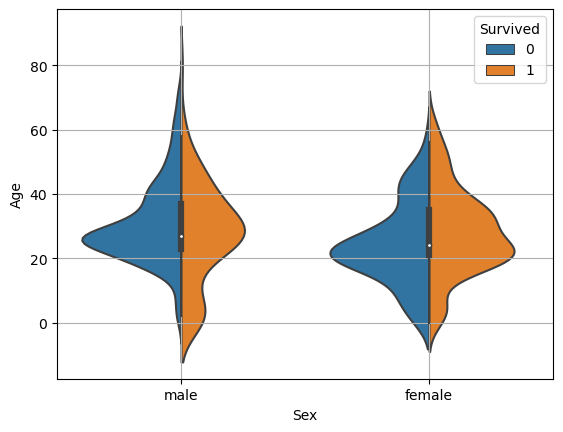

In [47]:
# 바이올린 플롯: 바이올린 형태로 데이터의 분포를 보기 쉽게 곡선으로 표현한 그래프
# 데이터가 많이 분포하는 부분은 두껍게,적게 분포하는 부분은 얇게 표현
sns.violinplot(data=train,x='Sex',y='Age',hue='Survived', split=True)
plt.grid()

# 20대부터 40대 사이의 분포가 없음 => 탑승자가 많았다!, 많이 사망했음

### 특성공학 : 새로운 컬럼을 추출하는 방식

- Parch : 함께 탑승한 부모, 자식의 수
- Sibsp : 함께 탑승한 형제, 자매
- 위 두개의 데이터를 확인해보니, 결국 비슷한 데이터 (함꼐 탑승한 사람을 의미)
- 두 개의 특성을 합쳐  새로운 컬럼 생성
-  train, test 둘 다 생성해주자!

In [48]:
# 두개의 컬럼을 더해서 가족의 숫자 라는 새로운 컬럼 생성
# + 1 은 나 자신의 숫자
train['Family'] = train['Parch'] + train['SibSp'] + 1
test['Family'] = test['Parch'] + test['SibSp'] + 1

In [49]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
 11  Family    891 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 90.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non

<AxesSubplot:xlabel='Family', ylabel='count'>

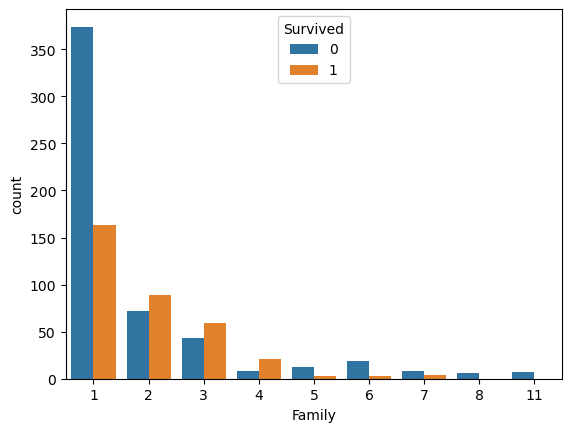

In [50]:
# 가족의 수에 따른 생존 여부 확인
sns.countplot(data=train,x='Family',hue='Survived')

# 1명 일때는 죽은 비율이 높았음
# 2~4명일 때 산 비율이 높다
# 5명 이상일 때 죽은 비율이 높았음

# 범주의 크기를 줄여주자! 사소한 관찰오류의 영향을 줄여주기 위함
# binning

In [51]:
# cut 함수 사용하여 카테고리화
# 가족의 수가 1이면 'Alone', 2~4명 'Small', 5명이상 'Large'
b=[0,1,4,11]  # 구간설정
l=['Alone','Small','Large'] # 카테고리명
train['Family'] = pd.cut(train['Family'],bins=b,labels=l)
test['Family'] = pd.cut(test['Family'],bins=b,labels=l)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    int64   
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Embarked  891 non-null    object  
 10  Deck      891 non-null    object  
 11  Family    891 non-null    category
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 84.5+ KB


<AxesSubplot:xlabel='Family', ylabel='count'>

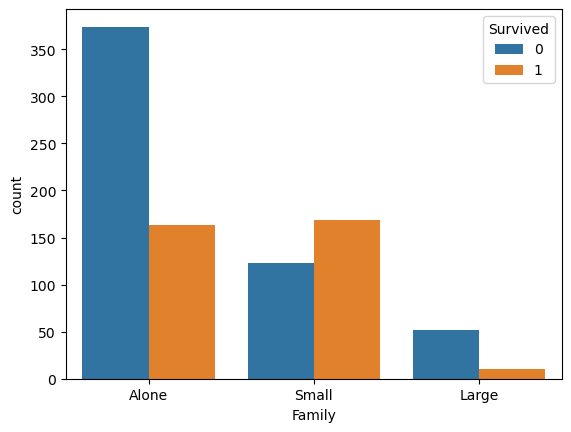

In [52]:
train.info()
sns.countplot(data=train,x='Family',hue='Survived')

# 같은 패턴을 묶어서 진행하면 데이터분석시 사소한오류를 줄여줄 수 있다

### text 데이터 새로운 특성 생성하기 ( Name 컬럼 )

In [53]:
# Name컬럼
train['Name'].head()
train['Name'][1]
# 성, 호칭, 이름
# 이름 데이터에서는 어떤 의미를 찾을 수 있을까?
# 호칭 ( Mr, Miss, Mrs, ... )을  통해서 생존률과 관계있는 새로운 특성을 생성해보자


'Braund, Mr. Owen Harris'

In [54]:
# split(): 특정 문자를 기준으로 문자열 데이터를 나눠주는 기능
train['Name'].str.split(',')
# 쉼표를 기준으로 나눈 데이터에서 1번 인덱스(호칭, 이름) 데이터만 추출
train['Name'].str.split(',')[1]
# 다시 한번 데이터를 . 기준으로 분리
train['Name'][1].split(',')[1].split('.')
# 나눠진 데이터에서 호칭 데이;터만 추출 (인덱스 0번 데이터)
train['Name'][1].split(',')[1].split('.')[0]
# 공백을 지워주는 명령어
train['Name'][1].split(',')[1].split('.')[0].strip()
len(train)

891

In [55]:
# 위 과정을 함수화하여 모든 데이터에 적용
def split_name(data):
    return data['Name'].split(',')[1].split('.')[0].strip()

In [56]:
# 위 과정을 함수화하여 모든 데이터에 적용
# def split_name(data):
#     return data.split(',')[1].split('.')[0].strip()
# train['Name'].apply(split_name)

In [57]:
train['Title'] = train.apply(split_name, axis=1)
test['Title'] = test.apply(split_name, axis=1)
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family,Title
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,M,Alone,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,M,Small,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,M,Alone,Mr
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,M,Alone,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,M,Small,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,26,0,0,A.5. 3236,8.0500,S,M,Alone,Mr
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C,C,Alone,Dona
1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,S,M,Alone,Mr


In [58]:
print(train['Title'].unique())
print(test['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


<AxesSubplot:xlabel='Title', ylabel='count'>

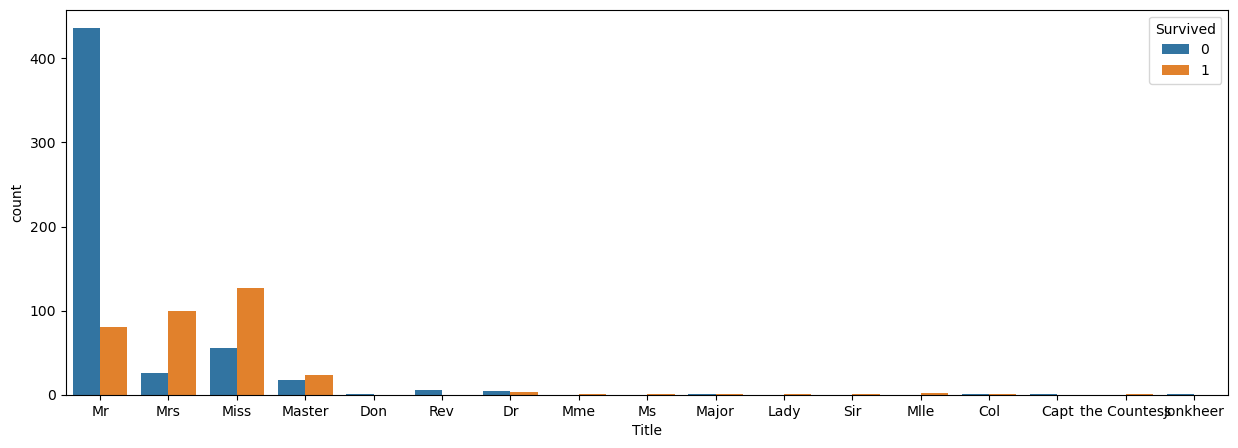

In [59]:
# 시각화
plt.figure(figsize=(15,5))
sns.countplot(data=train,x='Title',hue='Survived')
# Mr 가장 많고 사망자도 많음


<AxesSubplot:xlabel='Title', ylabel='count'>

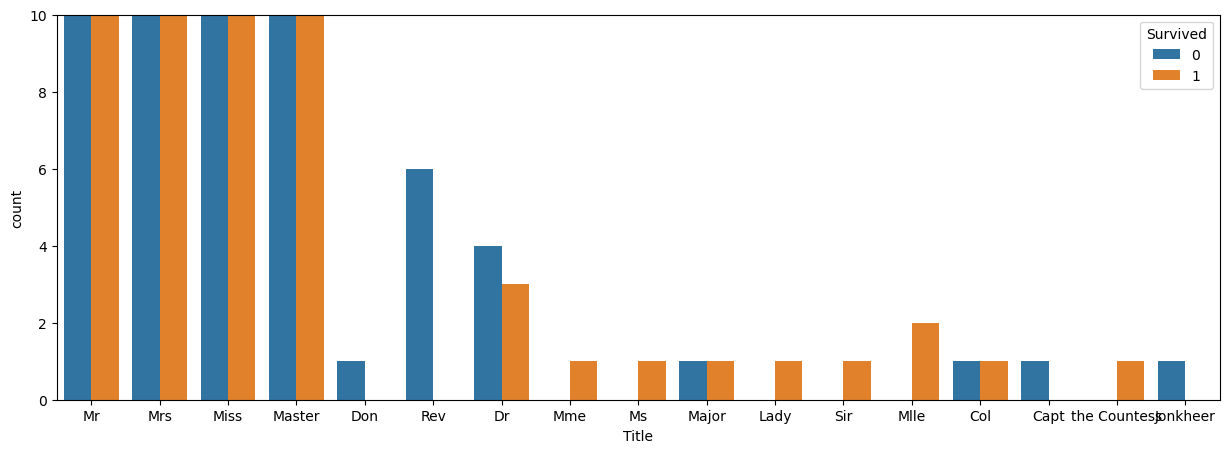

In [60]:
# 시각화 (y 범위 설정하여 크게 출력)
plt.figure(figsize=(15,5))
plt.ylim(0,10)
sns.countplot(data=train,x='Title',hue='Survived')

# Other ( 작은 범주는 그루핑 )
# Rev ( 목사님 ) -> 전부 사망, 특성으로 사용 가능 할 듯

- 데이터의 개수가 많아 특징 있는 데이터를 제외하고 나머지 데이터들은 Other 라는 새로운 그룹으로 묶어주기

In [61]:
# 전체 유일한 값 확인
print(train['Title'].unique())
# ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady' 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']

title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev','Don', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [62]:
print(len(title))  # 호칭 개수 확인 (17개)

# 중요한 다섯가지 호칭은 그대로 사용하고 나머지는 Other 라는 이름으로 변경
map_title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev'] + ['Other'] * 12
# 매핑!!


17


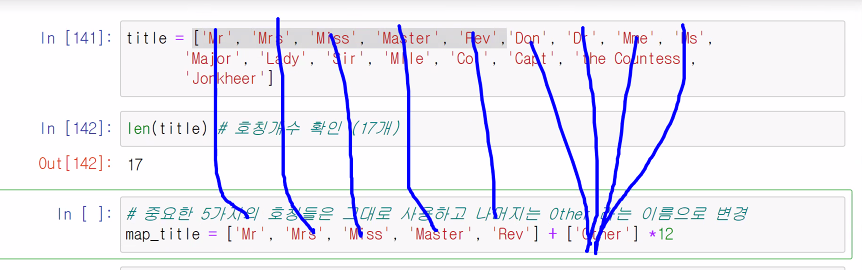

In [63]:
# dict(zip()) 함수 사용하여 리스트 형태의 title과 map_title를 순서대로 매핑!

t_dict = dict(zip(title, map_title))
t_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other'}

In [64]:
# t_dict 데이터를 실제 train의 'Title'에 대입해주기!!
train['Title'] = train['Title'].map(t_dict)

In [65]:
# 확인
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [66]:
# test 데이터도 변경, train에는 없는 'Dona'라는 값이 있음

# 처음부터 안 만들고 t_dict에 추가해서 처리 가능!
# t_dict['Dona'] = 'Other'

title = ['Mr','Mrs','Miss','Master','Rev','Ms','Col','Dr','Dona']
test['Title'].unique()
map_title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev'] + ['Other'] * 4

In [67]:
# Dona 라는 호칭을 가진 승객 확인
test[test['Title']=='Dona']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family,Title
PassengerId,,,,,,,,,,,,
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9,C,C,Alone,Dona


In [68]:
t_dict = dict(zip(title, map_title))
test['Title'] = test['Title'].map(t_dict)
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

### 필요없는 컬럼 삭제
- ticket, SibSp, Parch, Name


In [69]:
train.drop(['Name','Ticket','SibSp','Parch'], axis=1, inplace=True)
test.drop(['Name','Ticket','SibSp','Parch'], axis=1, inplace=True)

In [70]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    object  
 3   Age       891 non-null    int64   
 4   Fare      891 non-null    float64 
 5   Embarked  891 non-null    object  
 6   Deck      891 non-null    object  
 7   Family    891 non-null    category
 8   Title     891 non-null    object  
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 95.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    int64   
 1   Sex       418 non-null    object  
 2   Age       418 non-null    int64   
 3   Fare      418 non-null    float64 
 4   Embarked  418 non-null    ob

### 모델링 (분리, 모델선택, 학습, 평가)

In [71]:
# 분리
X_train = train.iloc[:,1:]
y_train = train['Survived']
X_test = test

In [72]:
print("훈련용 문제 :",X_train.shape)
print("훈련용 답 :",y_train.shape)
print("테스트용 문제 :",X_test.shape)

훈련용 문제 : (891, 8)
훈련용 답 : (891,)
테스트용 문제 : (418, 8)


- 인코딩 진행 -> one_hot 인코딩!

In [73]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [74]:
print("훈련용 문제 :",X_train.shape)
print("테스트용 문제 :",X_test.shape)
# 인코딩 후 확인해보니 특성 수가 다름!!  -->   기계학습 시 오류의 원인!!!
# 순서와 갯수 맞춰줘야 함

훈련용 문제 : (891, 26)
테스트용 문제 : (418, 25)


In [75]:
# 일일이 어떤 특성이 다른지 확인하지 않고 찾아보기
print(set(X_train.columns) - set(X_test.columns))

# set(): 중복이 없는 요소들로 구성된 집합, 연산 가능!


# 'Deck_T'가 있으면 1, 없으면 0
# 'X_test'에 0으로 채워주자
X_test['Deck_T']=0

{'Deck_T'}


In [76]:
print("훈련용 문제 :",X_train.shape)
print("테스트용 문제 :",X_test.shape)

훈련용 문제 : (891, 26)
테스트용 문제 : (418, 26)


In [77]:
X_test.info()
X_train.info()
# 기계 학습을 위해 X_train, X_test의 컬럼순서를 동일하게 맞춰주는 작업 필요

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Age           418 non-null    int64  
 2   Fare          418 non-null    float64
 3   Sex_female    418 non-null    uint8  
 4   Sex_male      418 non-null    uint8  
 5   Embarked_C    418 non-null    uint8  
 6   Embarked_Q    418 non-null    uint8  
 7   Embarked_S    418 non-null    uint8  
 8   Deck_A        418 non-null    uint8  
 9   Deck_B        418 non-null    uint8  
 10  Deck_C        418 non-null    uint8  
 11  Deck_D        418 non-null    uint8  
 12  Deck_E        418 non-null    uint8  
 13  Deck_F        418 non-null    uint8  
 14  Deck_G        418 non-null    uint8  
 15  Deck_M        418 non-null    uint8  
 16  Family_Alone  418 non-null    uint8  
 17  Family_Small  418 non-null    uint8  
 18  Family_Large  418 non-null 

In [78]:
X_test = X_test[X_train.columns]

In [79]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Age           418 non-null    int64  
 2   Fare          418 non-null    float64
 3   Sex_female    418 non-null    uint8  
 4   Sex_male      418 non-null    uint8  
 5   Embarked_C    418 non-null    uint8  
 6   Embarked_Q    418 non-null    uint8  
 7   Embarked_S    418 non-null    uint8  
 8   Deck_A        418 non-null    uint8  
 9   Deck_B        418 non-null    uint8  
 10  Deck_C        418 non-null    uint8  
 11  Deck_D        418 non-null    uint8  
 12  Deck_E        418 non-null    uint8  
 13  Deck_F        418 non-null    uint8  
 14  Deck_G        418 non-null    uint8  
 15  Deck_M        418 non-null    uint8  
 16  Deck_T        418 non-null    int64  
 17  Family_Alone  418 non-null    uint8  
 18  Family_Small  418 non-null 

### 모델 선택 및 학습
- 우리가 이제까지 배운 모델 2개
    - knn모델 (최근접 이웃 모델)
    - 의사결정나무모델
- 클래스 2개 -> 범주 -> 분류 모델

In [80]:
# knn
from sklearn.neighbors import KNeighborsClassifier
# tree
from sklearn.tree import DecisionTreeClassifier

# 교차검증 -> 과적합,과소적합 확인용: 일반화를 위해
from sklearn.model_selection import cross_val_score

- tree model1
    - max_depth=5
    

In [81]:
# 트리 객체 생성 -> max_depth=5
tree_model1 = DecisionTreeClassifier(max_depth=5)

In [82]:
# 일반화 성능을 확인할 수 있는 교차검증 진행 (cv=5)
res = cross_val_score(tree_model1,X_train,y_train,cv=5)
res.mean()

0.8148327160881301

In [83]:
# 학습
tree_model1.fit(X_train,y_train)
# 예측 
pre1 = tree_model1.predict(X_test)
pre1

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [84]:
# kaggle 답안지 제출하기
# 우리가 예측한 결과 적어줄 답안지
result = pd.read_csv("./data/gender_submission.csv")
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [85]:
tree_model1 = DecisionTreeClassifier(max_depth=5)
res = cross_val_score(tree_model1,X_train,y_train,cv=15)
res.mean()

0.8116195856873823

In [87]:
# 예측한 답 (pre1)을 result의 'Survives' 컬럼에 대입
result['Survived'] = pre1

In [88]:
# 답안지 csv파일로 저장
result.to_csv('./data/phy01.csv', index=False)

In [89]:
model=KNeighborsClassifier(n_neighbors=4)

model.fit(X_train, y_train)
# 예측 ( 예측 결과 보고싶다 -> predict, 정확도만 볼래 -> score )
pre = model.predict(X_test)
pre

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [90]:
result = pd.read_csv("./data/gender_submission.csv")
result
result['Survived'] = pre
result.to_csv('./data/phy02.csv', index=False)

In [86]:
tree_model = DecisionTreeClassifier(max_depth=4)
res = cross_val_score(tree_model1,X_train,y_train,cv=6)
res.mean()
tree_model.fit(X_train,y_train)
# 예측 
pre = tree_model.predict(X_test)
pre
result = pd.read_csv("./data/gender_submission.csv")
result
result['Survived'] = pre
result.to_csv('./data/phy03.csv', index=False)


In [91]:
train_list = []
n_set=range(1,100)
# 반복문을 활용하여 1~99까지의 이웃값을 넣어 예측
for k in n_set:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    # 정확도 확인
    train_list.append(model.score(X_train,y_train))

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

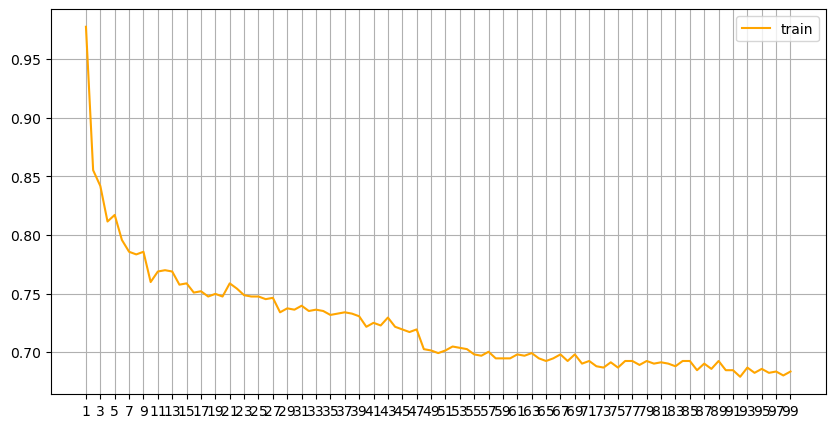

In [92]:
plt.figure(figsize=(10,5))
plt.plot(n_set, train_list, c='orange', label='train')
plt.legend()
# 눈금선
plt.grid()
plt.xticks(range(1,100,2))
plt.show()

In [95]:
# 경고창 안띄우기
import warnings
warnings.filterwarnings('ignore')

In [97]:
knn_model = KNeighborsClassifier()

# 일반화 성능 확인 => 교차검증
result2 =  cross_val_score(knn_model,X_train,y_train,cv=5)

In [99]:
result2.mean()
# 모델 학습
knn_model.fit(X_train,y_train)
# 모델 예측
pre2 = knn_model.predict(X_test)

# OMR 답안지 불러오기
omr2 = pd.read_csv("./data/gender_submission.csv")
omr2['Survived'] = pre2
omr2.to_csv('./data/phy04.csv', index=False)


In [ ]:
tree_model2 = DecisionTreeClassifier(max_depth=3)
res = cross_val_score(tree_model2,X_train,y_train,cv=6)
print(res.mean())
tree_model2.fit(X_train,y_train)
# 예측 
pre = tree_model2.predict(X_test)
pre
result = pd.read_csv("./data/gender_submission.csv")
result
result['Survived'] = pre
result.to_csv('./data/phy03.csv', index=False)


#### 성능 개선 방안
- 데이터의 전체 양 늘리기
- 전처리 방식 수정
- 더 좋은 성능을 가지는 모델 사용
- 하이퍼파라미터 조절 (약 5% 정도의 향상을 보임) -> 눈에 띄는차이를 보고싶다면 차라리 전처리를 신경쓰기!!
- 정규화, 숫자값들의 범위 조정(scale 조정)
    - 거리 계산에 예민한 knn 모델의 성능을 높이기 위해서 데이터의 범위를 조정
    - sklearn 에서 scaler를 제공해주고 있음 (사용법만 확인)

In [100]:
# scaler 불러오기
from sklearn.preprocessing import StandardScaler

In [102]:
# 범위를 정규화해주는 도구 만들어주기 (객체 생성)
s_scaler = StandardScaler()

In [105]:
# scaler 도 '학습'이 필요하다!!!

# X_train 훈련용 문제 데이터에 대해 학습
s_scaler.fit(X_train)


StandardScaler()

In [106]:
# 학습된 스케일러를 사용해서 데이터의 범위를 변환
# train과 test 모두!! 동일한 스케일링 진행해야 한다!!!
t_X_train = s_scaler.transform(X_train)
t_X_test = s_scaler.transform(X_test)

In [108]:
# 교차검증 진행
cross_val_score(knn_model,t_X_train,y_train,cv=5)
# 10% 이상의 정확도가 올라간 것을 확인했음!!

array([0.82122905, 0.79213483, 0.81460674, 0.76966292, 0.85393258])

In [109]:
# 모델 학습
knn_model.fit(t_X_train,y_train)
# 모델 예측
pre2 = knn_model.predict(t_X_test)

# OMR 답안지 불러오기
omr2 = pd.read_csv("./data/gender_submission.csv")
omr2['Survived'] = pre2
omr2.to_csv('./data/phy05.csv', index=False)


- 앙상블(ensemble) 모델 적용
    - '조화'라는 의미를 가진다
    - 하나의 강력한 모델보다는 여러개의 모델을 연결하여 더 높은 정확도를 예측
    - voting, bagging, boosting

In [110]:
# 보팅 모델 불러오기
# 서로 다른 모델들의 예측결과를 투표하는 방식으로 진행된다!!
from sklearn.ensemble import VotingClassifier


In [112]:
# 모델들, 보팅방식
votring_model = VotingClassifier(estimators=[('knn1',knn_model),('tree1',tree_model),('tree2',tree_model1)],
                 voting='soft')

In [113]:
# 교차검증
cross_val_score(votring_model, X_train,y_train,cv=5)

array([0.79888268, 0.80898876, 0.80337079, 0.78651685, 0.84269663])

- Bagging
    - 같은 여러개의 모델 사용
    - 대표적인 방식으로 random forest 있음(의사결정나무 이반)

In [114]:
# random forest 모델 불러오기
from sklearn.ensemble import RandomForestClassifier

In [115]:
# 모델 객체 생성
forest_model = RandomForestClassifier(n_estimators=100,random_state=7)
# n_estimators : 생성 할 tree의 개수
# random_state : 랜덤 수 고정

In [116]:
# 성능의 일반화 확인 : 교차검증
cross_val_score(forest_model,X_train,y_train,cv=5)

array([0.82681564, 0.79213483, 0.83707865, 0.75280899, 0.83146067])

- boosting
    - 분류할 때 잘못 분류된 데이터에 가중치를 부여하면서 연속적으로 분류해 나가는 방식
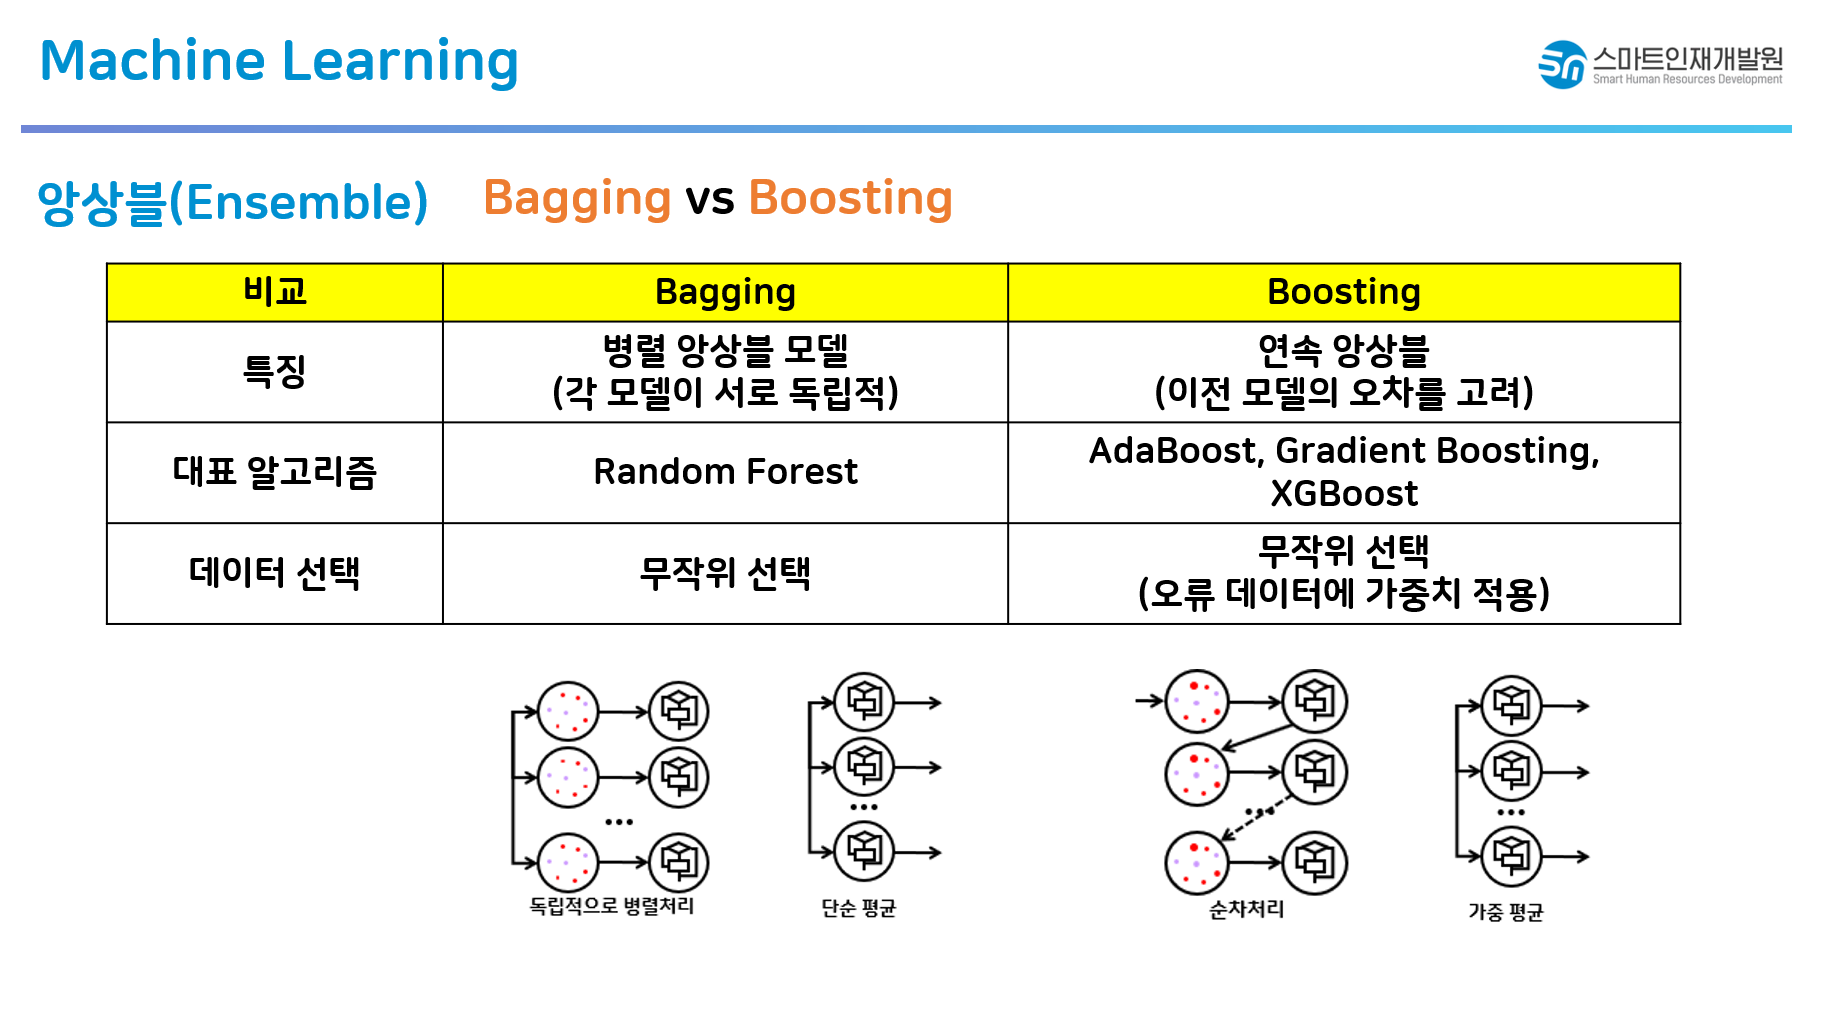

In [117]:
# 부스팅 모델 불러오기
from sklearn.ensemble import AdaBoostClassifier

In [118]:
ada_model = AdaBoostClassifier(n_estimators=100,random_state=10)

In [120]:
res = cross_val_score(ada_model,X_train,y_train,cv=5)

# 부스팅 모델의 일반화 성능!
res.mean()

0.8182160567447117